In [1]:
import pandas as pd
import os, sys
from sklearn.datasets import make_regression

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from noventis.predictor import NoventisManualPredictor

In [2]:
predictor = NoventisManualPredictor(
    model_name=['xgboost', 'lightgbm', 'random_forest'],
    task='classification',
    tune_hyperparameters=True,  
    n_trials=15,               
    output_dir='manual_run_results',
    random_state=42
)

INFO:root:Output directory created at: manual_run_results/run_20251008_162447
INFO:root:ManualPredictor initialized for classification


In [3]:
df_class = pd.read_csv('../dataset_for_examples/dummy_classification_churn.csv')

INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=400, Test=100
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: XGBOOST
INFO:root:Starting hyperparameter tuning for XGBOOST...
INFO:root:Tuning complete. Best parameters: {'n_estimators': 475, 'learning_rate': 0.042781805436749254, 'max_depth': 5, 'subsample': 0.7988466628226518, 'colsample_bytree': 0.8427467119527459, 'gamma': 2.0156584975923852}
INFO:root:Training finished in 0.52 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Starting hyperparameter tuning for LIGHTGBM...
INFO:root:Tuning complete. Best parameters: {'n_estimators': 547, 'learning_rate': 0.1487097197609081, 'num_leaves': 69, 'max_depth': 10, 'reg_alpha': 0.12963647917302912, 'reg_lambda': 0.4090300054136835, 'is_unbalance': False}
INFO:root:Training finished in 0.57 seconds.
INFO:root:Processing model: RANDOM_FOREST
INFO:root:Starting hyper

MODEL COMPARISON - ALL METRICS
               accuracy  precision  recall  f1_score
model                                               
lightgbm           0.94   0.940000    0.94  0.939976
random_forest      0.94   0.940000    0.94  0.939976
xgboost            0.93   0.930144    0.93  0.929937


INFO:root:Plot saved to: manual_run_results/run_20251008_162447/plots/metric_comparison_f1_score.png


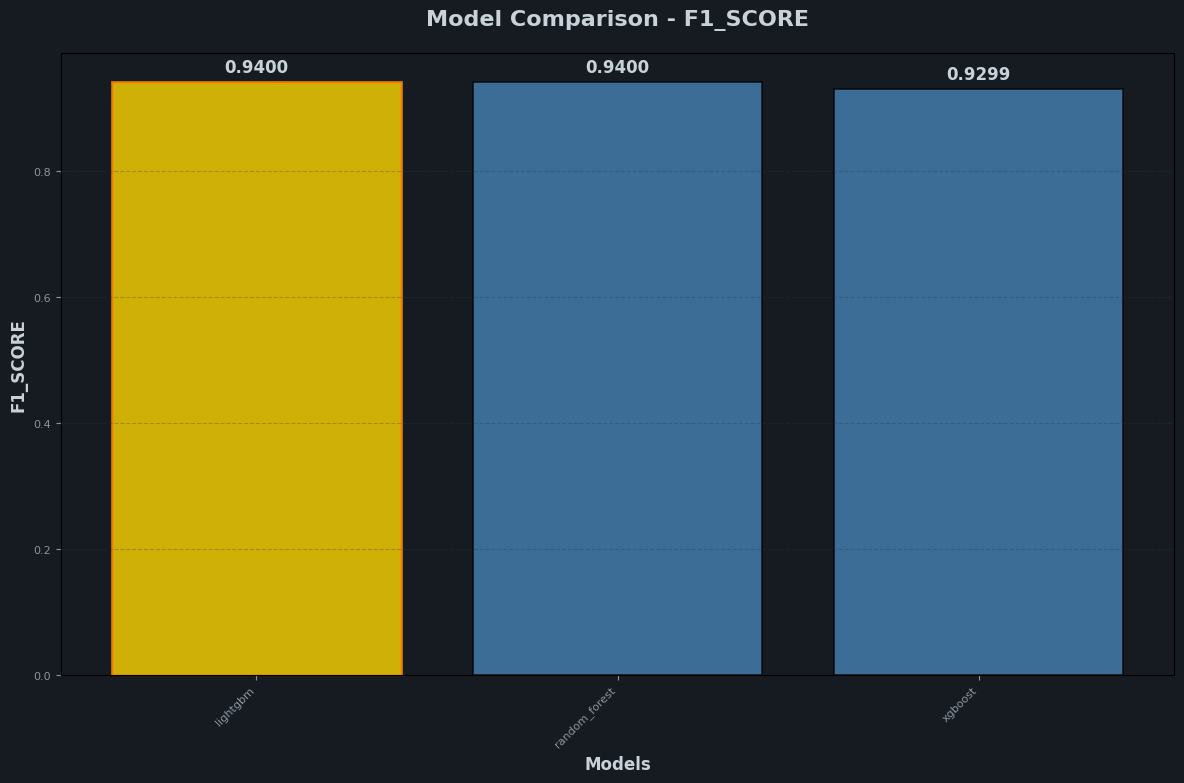

INFO:root:Preparing report for display in output cell...
INFO:root:HTML report successfully saved to: manual_run_results/run_20251008_162447/reports/analysis_report.html


,accuracy,precision,recall,f1_score
model,,,,
lightgbm,0.9400,0.9400,0.9400,0.9400
random_forest,0.9400,0.9400,0.9400,0.9400
xgboost,0.9300,0.9301,0.9300,0.9299

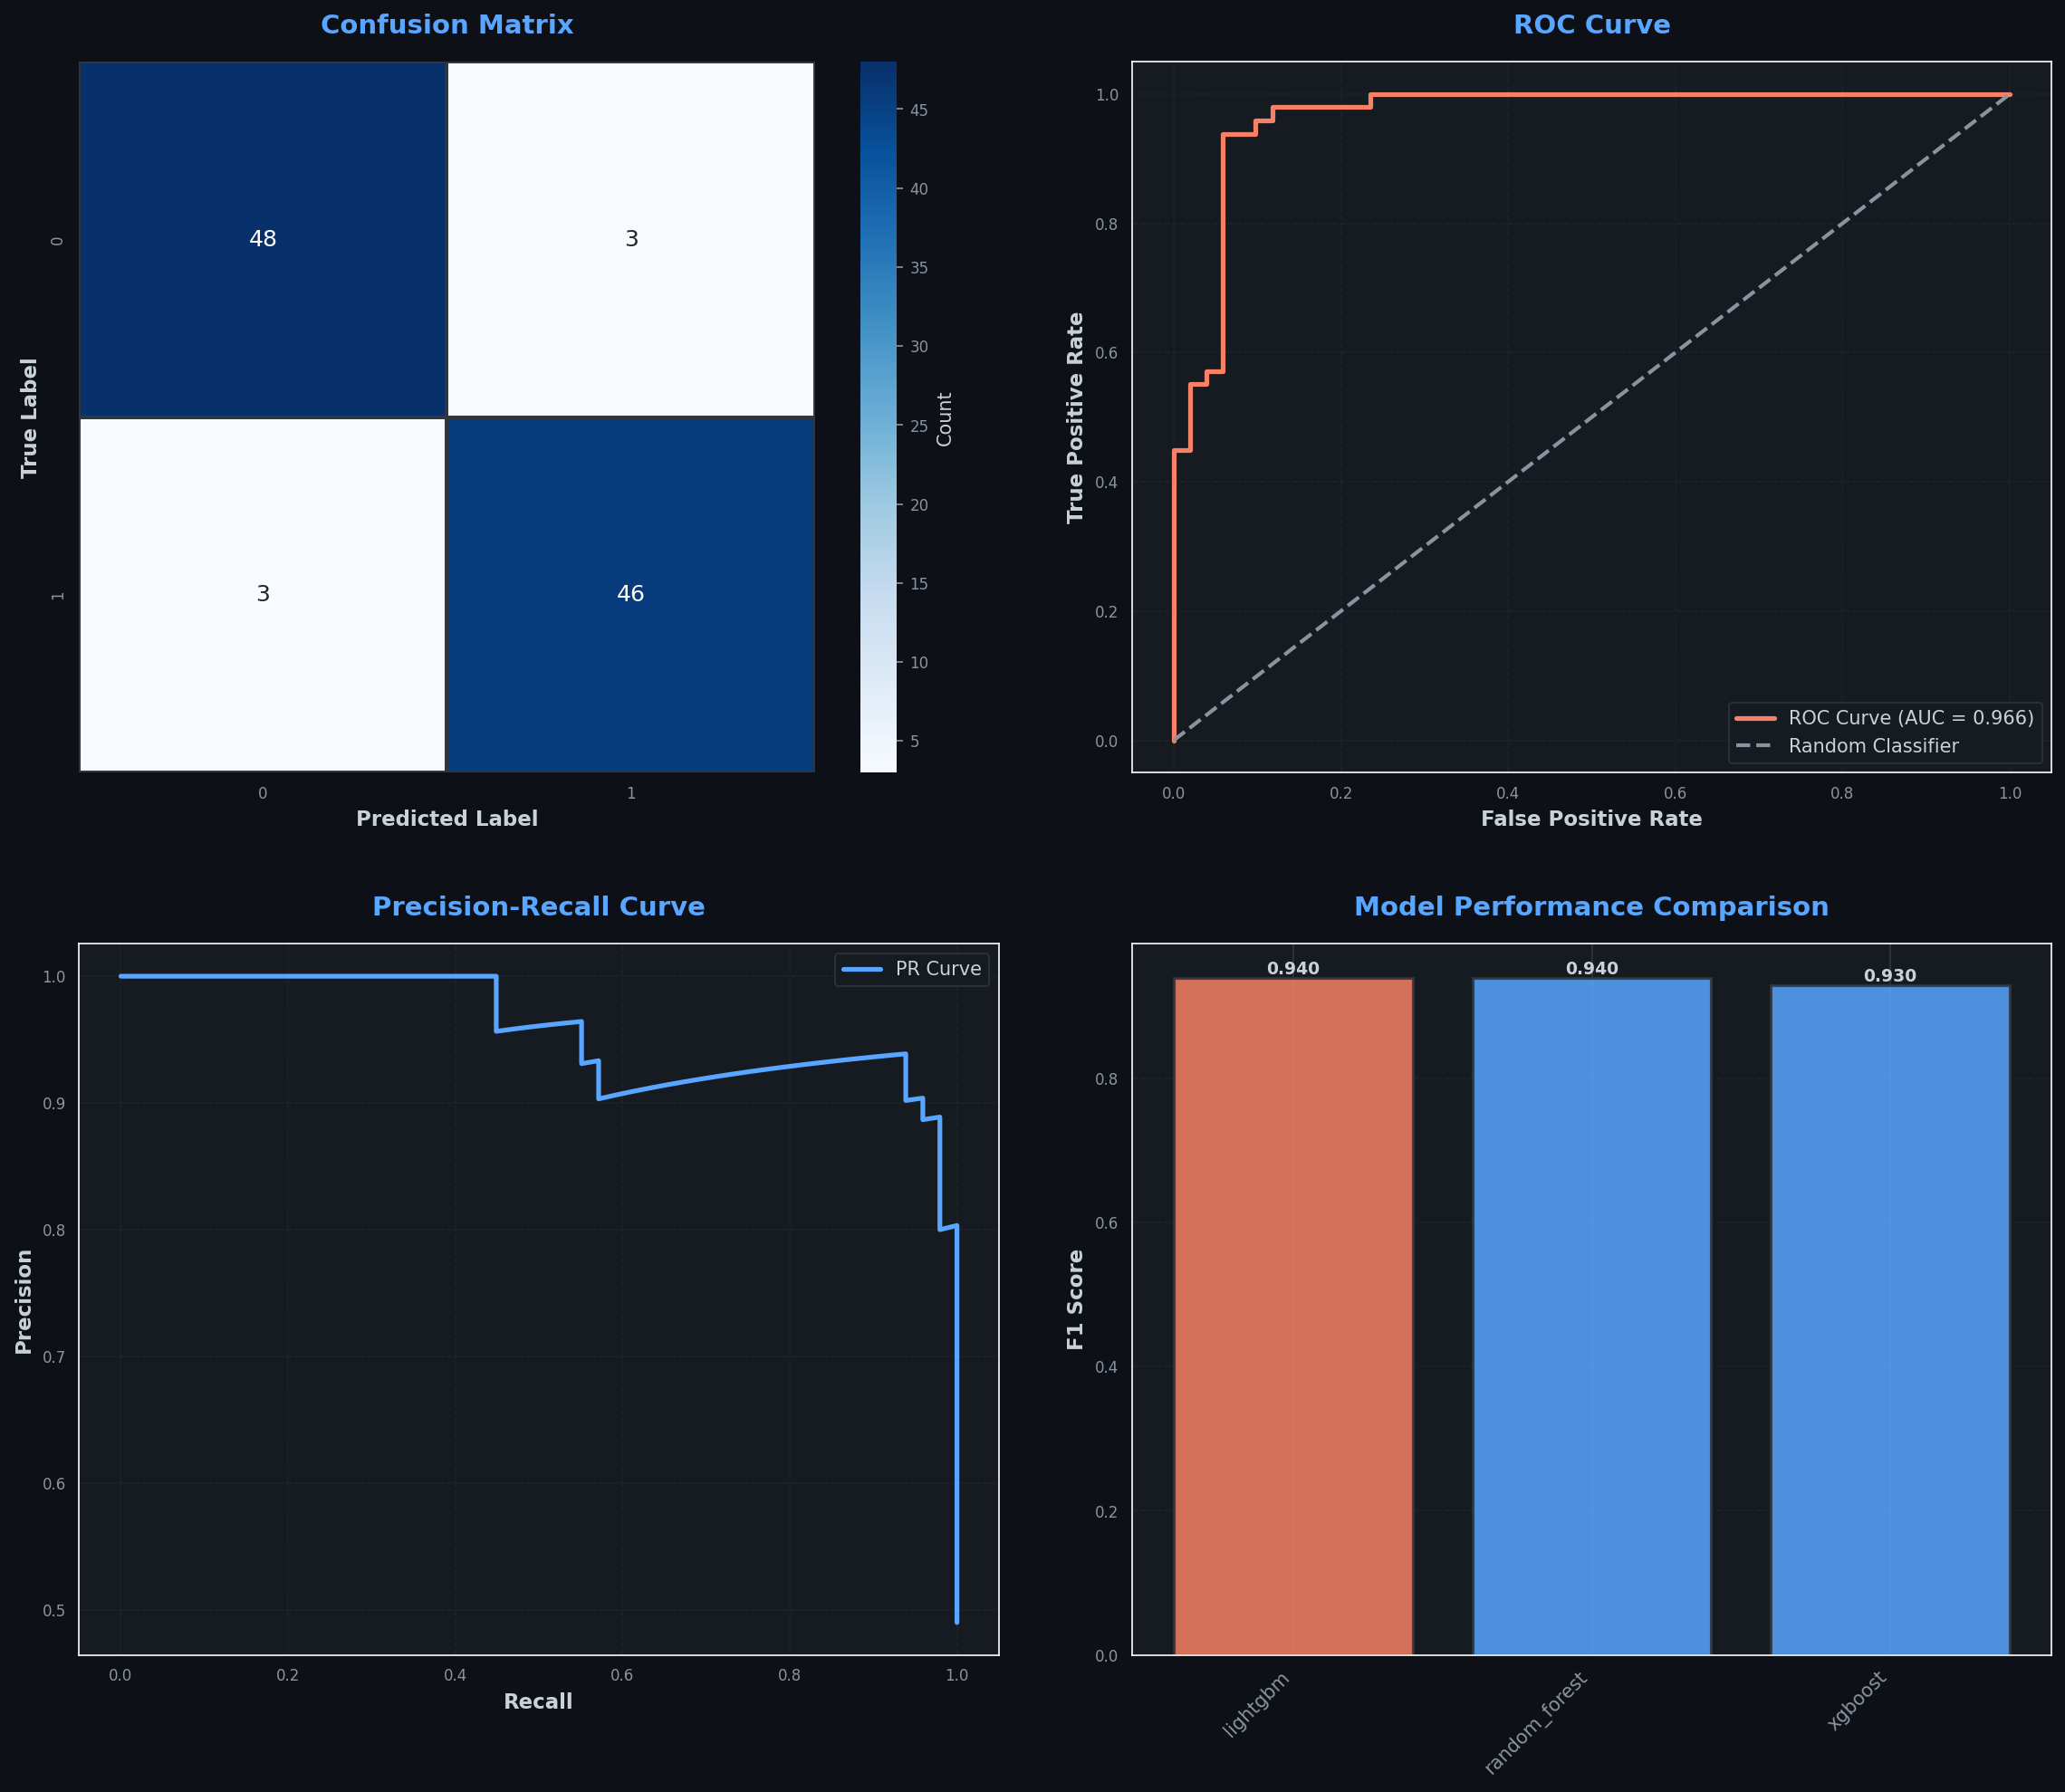
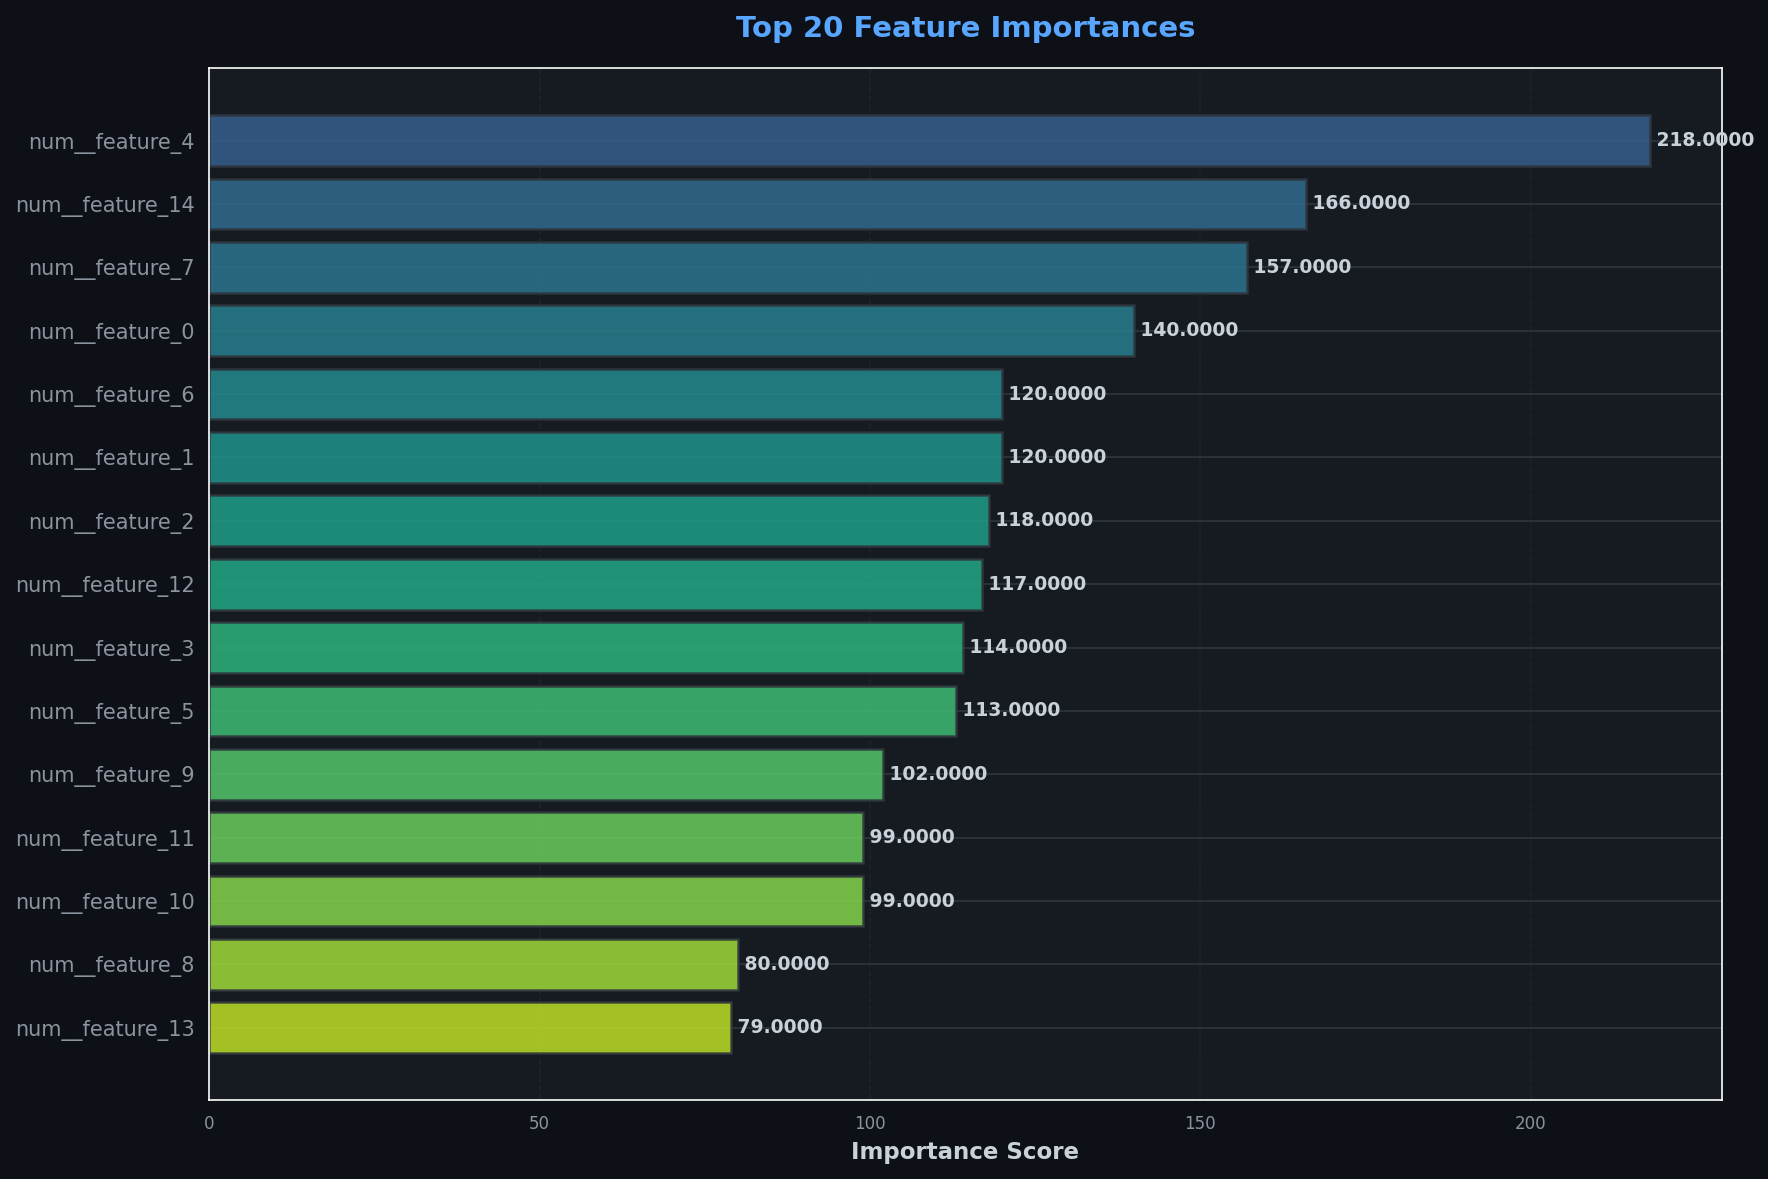
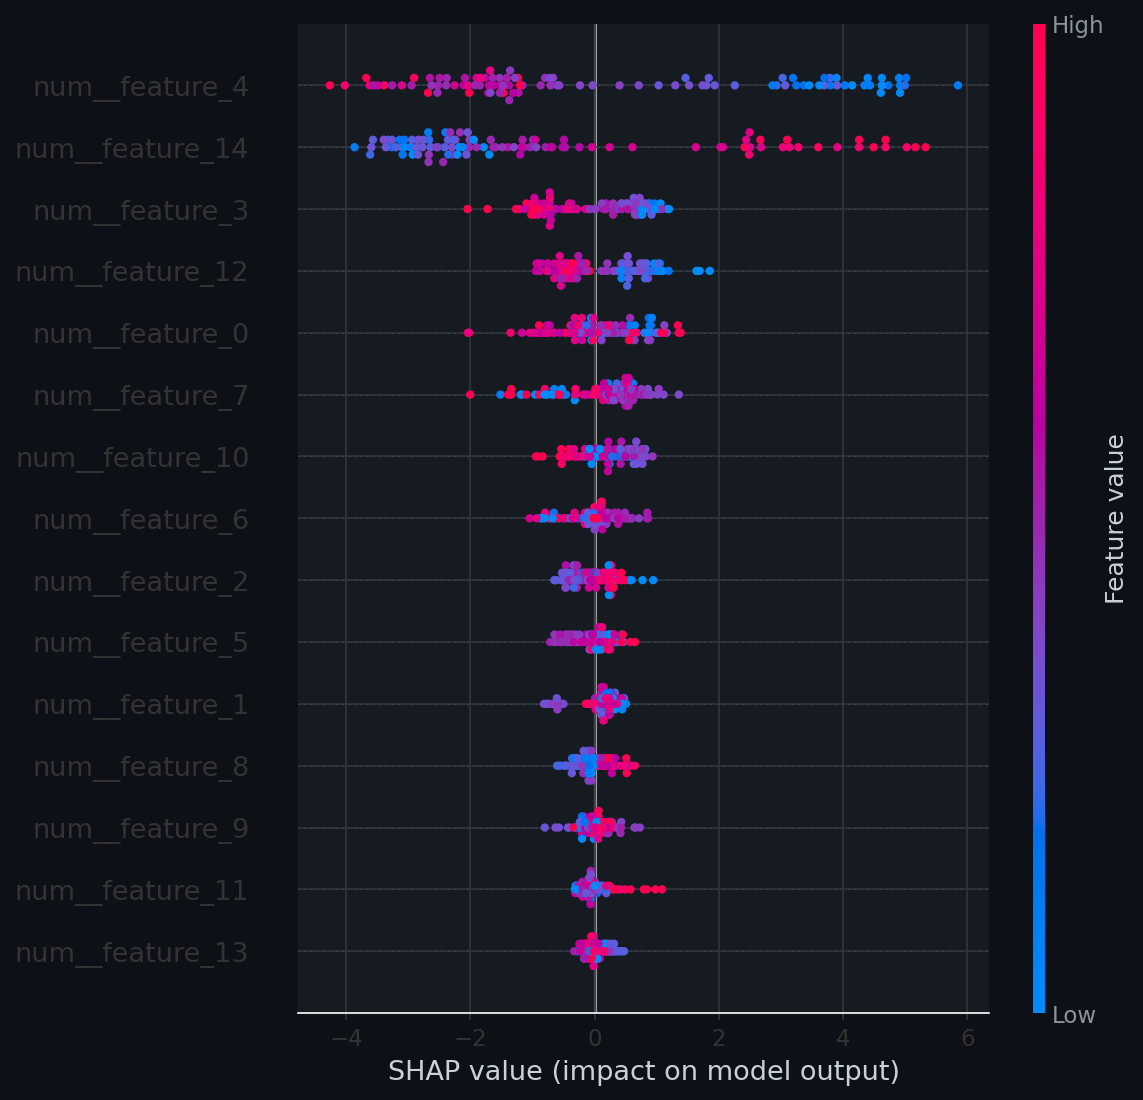

INFO:root:Report displayed successfully.


In [4]:
results = predictor.fit(
    df=df_class,
    target_column='churn',
    test_size=0.2,
    compare=True,  
    explain=True,
    display_report=True
)

In [5]:
predictor_reg = NoventisManualPredictor(
    model_name=['linear_regression', 'random_forest', 'lightgbm'],
    task='regression',
    tune_hyperparameters=True,
    n_trials=15,              
    cv_folds=3,                
)


INFO:root:ManualPredictor initialized for regression


INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=240, Test=60


INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LINEAR_REGRESSION
INFO:root:Starting hyperparameter tuning for LINEAR_REGRESSION...
INFO:root:Training finished in 0.00 seconds.
INFO:root:Processing model: RANDOM_FOREST
INFO:root:Starting hyperparameter tuning for RANDOM_FOREST...
INFO:root:Tuning complete. Best parameters: {'n_estimators': 449, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2}
INFO:root:Training finished in 4.64 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Starting hyperparameter tuning for LIGHTGBM...
INFO:root:Tuning complete. Best parameters: {'n_estimators': 1115, 'learning_rate': 0.2576590574716229, 'num_leaves': 32, 'max_depth': 4}
INFO:root:Training finished in 7.79 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: LINEAR_REGRESSION with r2_score = 0.9923
INFO:root:Preparing report for display in output cell...


,mae,mse,rmse,r2_score
model,,,,
linear_regression,12.9023,241.1078,15.5276,0.9923
lightgbm,50.0866,3922.1882,62.6274,0.8747
random_forest,65.3394,7183.4812,84.7554,0.7704

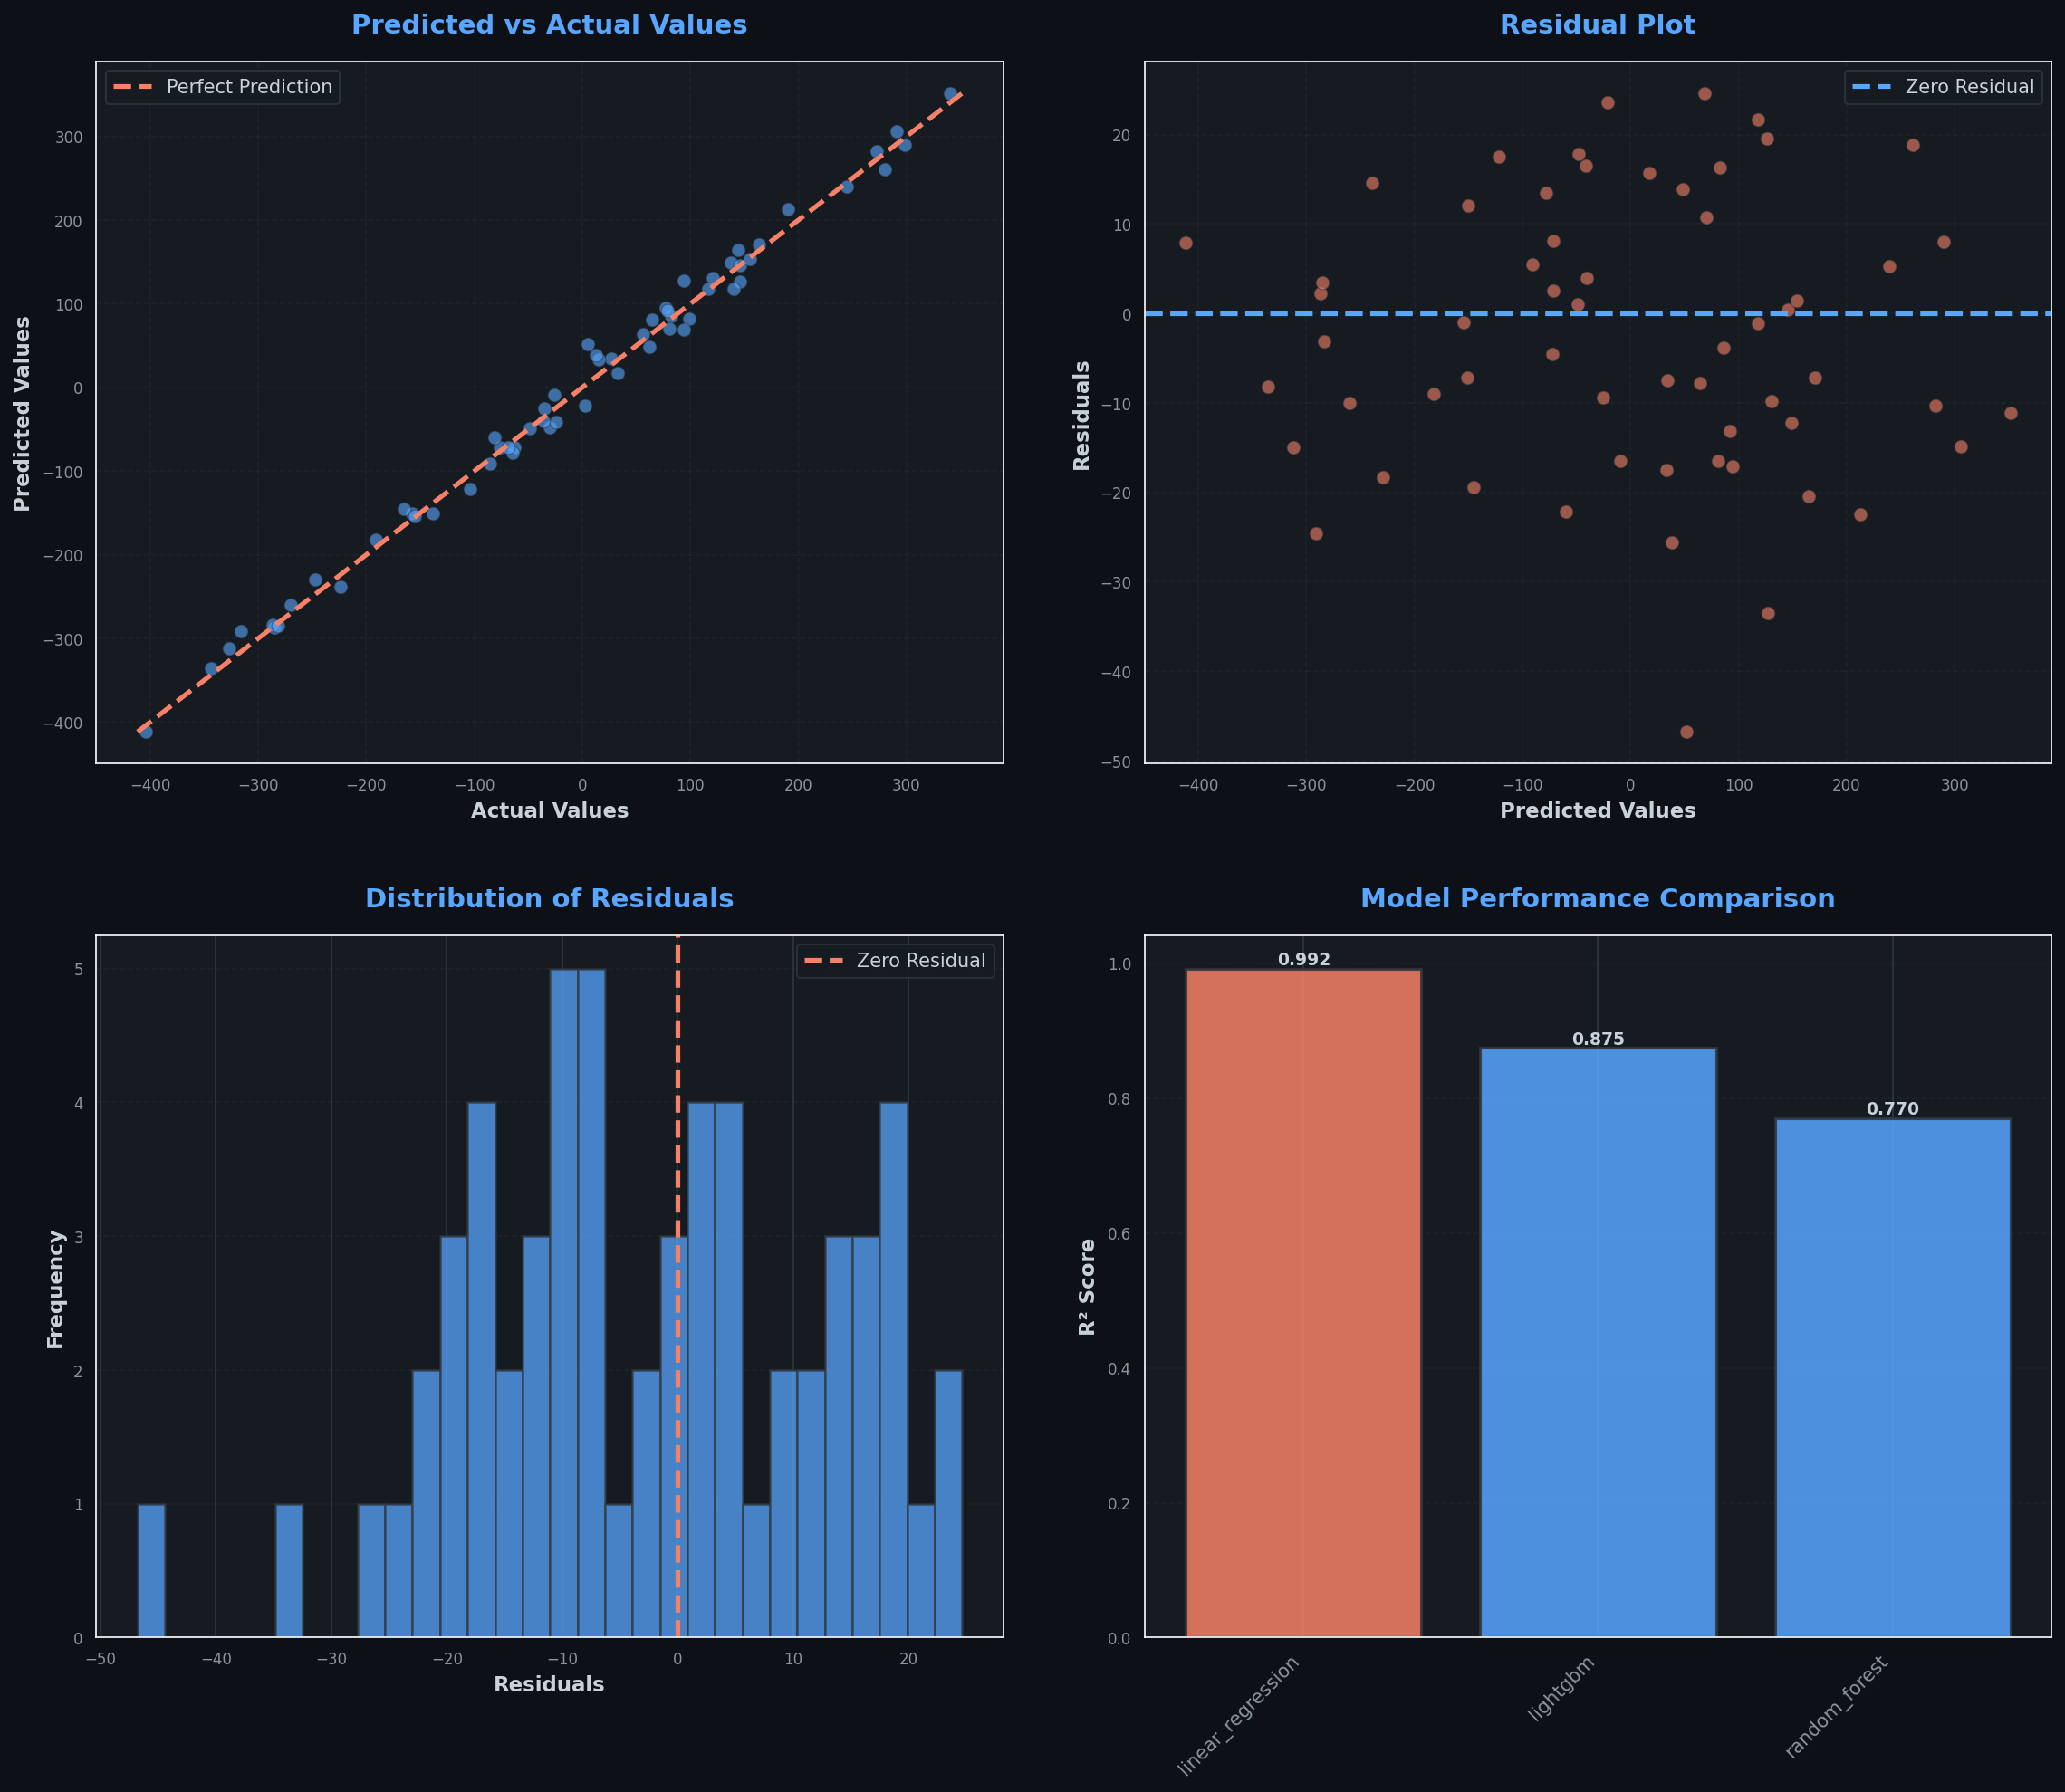
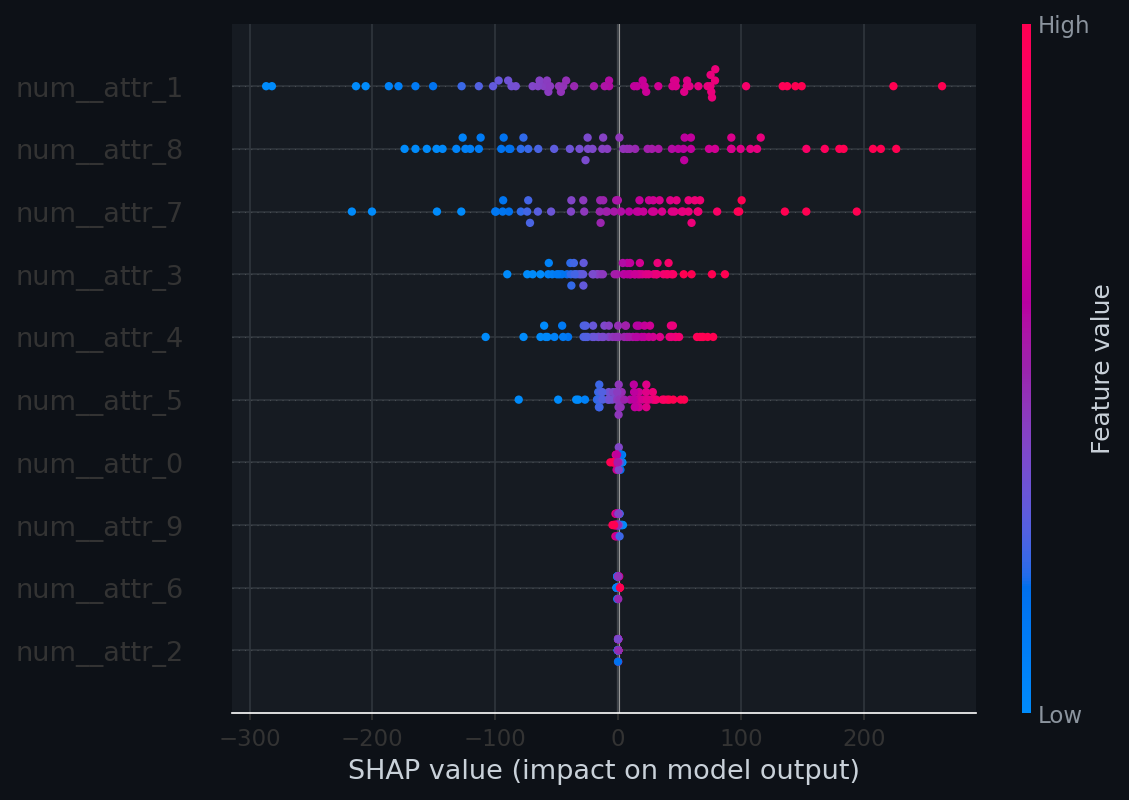

INFO:root:Report displayed successfully.


In [6]:
df_reg = pd.read_csv('../dataset_for_examples/dummy_regression_house_price.csv')
reg_results = predictor_reg.fit(
    df=df_reg,
    target_column='house_price',
    display_report=True
)
